**Objective:**  
To analyze patterns, trends, and drivers of financial inclusion in Ethiopia, focusing on Access, Usage, and key enabling factors.


### Setup & Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display settings
pd.set_option("display.max_columns", 100)
plt.rcParams["figure.figsize"] = (10, 5)

# Load enriched dataset (from Task 1)
data = pd.read_csv( "data\processed\ethiopia_fi_unified_data_enriched.csv"
)

data.head()


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,unit,observation_date,period_start,period_end,fiscal_year,gender,location,region,source_name,source_type,source_url,confidence,related_indicator,relationship_type,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,%,2014-12-31,NaN,NaN,2014,all,national,NaN,Global Findex 2014,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,%,2017-12-31,NaN,NaN,2017,all,national,NaN,Global Findex 2017,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,%,2021-12-31,NaN,NaN,2021,all,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,%,2021-12-31,NaN,NaN,2021,male,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,%,2021-12-31,NaN,NaN,2021,female,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN


## Dataset Overview

This section summarizes the dataset composition by record type, pillar, and data source.


### Record Types

In [2]:
data["record_type"].value_counts()


record_type
observation    33
event          12
target          3
impact_link     3
Name: count, dtype: int64

### Pillars

In [3]:
data["pillar"].value_counts(dropna=False)


pillar
ACCESS           17
USAGE            16
NaN              12
GENDER            5
AFFORDABILITY     1
Name: count, dtype: int64

### Source Types

In [4]:
data["source_type"].value_counts()


source_type
operator           15
survey             10
regulator           7
research            4
policy              3
calculated          2
news                2
operator_report     2
press_release       2
industry_report     1
Name: count, dtype: int64

**Observations**
- Observations dominate the dataset, while impact links are sparse.
- Usage-related indicators are more frequent than Access indicators.
- Data sources are concentrated in surveys and operator reports.


## Temporal Coverage

Analyze which indicators are available across years to identify coverage gaps.


In [5]:
obs = data[data["record_type"] == "observation"].copy()
obs["year"] = pd.to_datetime(obs["observation_date"], errors="coerce").dt.year

coverage = (
    obs.groupby(["indicator_code", "year"])
    .size()
    .unstack(fill_value=0)
)

coverage


year,2014,2017,2021,2023,2024,2025
indicator_code,,,,,,
ACC_4G_COV,0,0,0,1,0,1
ACC_FAYDA,0,0,0,0,1,2
ACC_MM_ACCOUNT,0,0,1,0,1,0
ACC_MOBILE_PEN,0,0,0,0,0,1
ACC_OWNERSHIP,1,1,3,0,1,0
AFF_DATA_INCOME,0,0,0,0,1,0
GEN_GAP_ACC,0,0,1,0,1,0
GEN_GAP_MOBILE,0,0,0,0,1,0
GEN_MM_SHARE,0,0,0,0,1,0


### Temporal coverage improves significantly after 2014, with sparse data before 2011.


## Data Quality Assessment


### Confidence Levels

In [6]:
data["confidence"].value_counts(normalize=True)


confidence
high      0.823529
medium    0.156863
low       0.019608
Name: proportion, dtype: float64

### Missing Values

In [7]:
data.isna().mean().sort_values(ascending=False).head(10)


impact_estimate      1.000000
region               1.000000
impact_direction     0.941176
relationship_type    0.941176
evidence_basis       0.941176
related_indicator    0.941176
impact_magnitude     0.941176
lag_months           0.941176
notes                0.843137
value_text           0.803922
dtype: float64

**Key Limitations** : 
Several infrastructure and usage indicators rely on medium or low confidence estimates, limiting longitudinal robustness.


## Indicator Coverage and Gaps


In [8]:
obs["indicator_code"].value_counts()


indicator_code
ACC_OWNERSHIP         6
ACC_FAYDA             3
ACC_MM_ACCOUNT        2
ACC_4G_COV            2
USG_P2P_COUNT         2
GEN_GAP_ACC           2
ACC_MOBILE_PEN        1
USG_P2P_VALUE         1
USG_ATM_VALUE         1
USG_ATM_COUNT         1
USG_TELEBIRR_USERS    1
USG_TELEBIRR_VALUE    1
USG_MPESA_USERS       1
USG_CROSSOVER         1
USG_MPESA_ACTIVE      1
USG_ACTIVE_RATE       1
AFF_DATA_INCOME       1
GEN_MM_SHARE          1
GEN_GAP_MOBILE        1
TELEBIRR_USERS        1
SMARTPHONE_PEN        1
MPESA_USERS           1
Name: count, dtype: int64

#### Digital payment usage and infrastructure indicators show sparse longitudinal coverage, limiting robust trend analysis.


## Access Analysis: Account Ownership (2011–2024)


   year  value_numeric
0  2014           22.0
1  2017           35.0
2  2021           46.0
3  2021           56.0
4  2021           36.0
5  2024           49.0


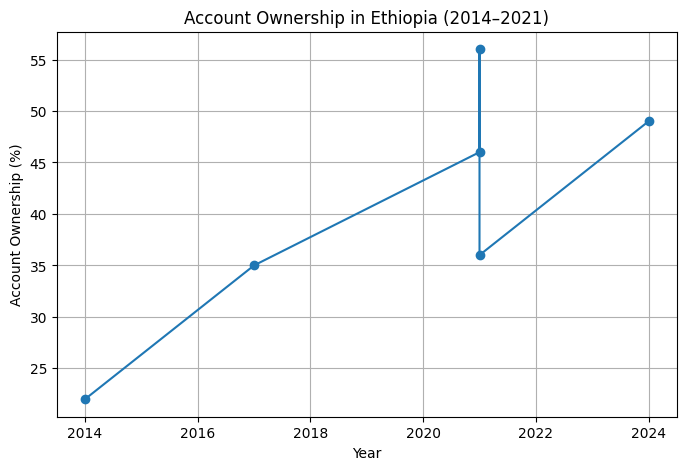

In [12]:
# Filter correct indicator
access = obs[obs["indicator_code"] == "ACC_OWNERSHIP"].copy()

# Create year from observation_date
access["year"] = pd.to_datetime(
    access["observation_date"], errors="coerce"
).dt.year

# Clean and sort
access = access.dropna(subset=["year", "value_numeric"])
access = access.sort_values("year")

# Sanity check (you should see rows here)
print(access[["year", "value_numeric"]])

# Plot
plt.figure(figsize=(8,5))
plt.plot(access["year"], access["value_numeric"], marker="o")
plt.title("Account Ownership in Ethiopia (2014–2021)")
plt.xlabel("Year")
plt.ylabel("Account Ownership (%)")
plt.grid(True)
plt.show()


### Access Analysis: Growth Rates Between Survey Years

In [13]:
# Calculate growth rates between survey years
access_growth = access.copy()
access_growth["growth_pp"] = access_growth["value_numeric"].diff()

access_growth


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,unit,observation_date,period_start,period_end,fiscal_year,gender,location,region,source_name,source_type,source_url,confidence,related_indicator,relationship_type,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,year,growth_pp
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,%,2014-12-31,NaN,NaN,2014,all,national,NaN,Global Findex 2014,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN,2014,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,%,2017-12-31,NaN,NaN,2017,all,national,NaN,Global Findex 2017,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2017,13.0
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,%,2021-12-31,NaN,NaN,2021,all,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2021,11.0
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,%,2021-12-31,NaN,NaN,2021,male,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021,10.0
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,%,2021-12-31,NaN,NaN,2021,female,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021,-20.0
5,REC_0006,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,49.0,NaN,percentage,%,2024-11-29,2024-10-15,2024-11-29,2024,all,national,NaN,Global Findex 2024,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,Account ownership increased from 46% to 49%,Survey Oct-Nov 2024,NaN,2024,13.0


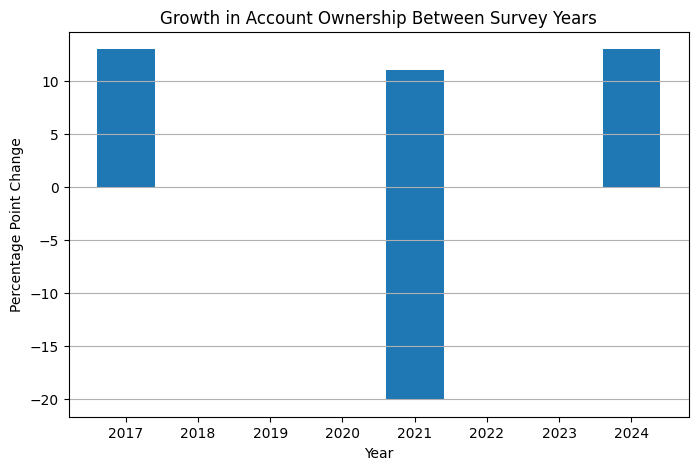

In [14]:
# Visualize growth rates
plt.figure(figsize=(8,5))
plt.bar(access_growth["year"], access_growth["growth_pp"])
plt.title("Growth in Account Ownership Between Survey Years")
plt.xlabel("Year")
plt.ylabel("Percentage Point Change")
plt.grid(True, axis="y")
plt.show()


### Insight

Account ownership increased rapidly between 2014–2017 and 2017–2021.

However, subsequent digital payment expansion did not coincide with comparable increases in formal account ownership.

### Gender Gap Analysis (Access)

In [15]:
gender_access = obs[
    (obs["indicator_code"] == "ACC_OWNERSHIP") &
    (obs["gender"].isin(["male", "female"]))
].copy()

gender_access["year"] = pd.to_datetime(
    gender_access["observation_date"], errors="coerce"
).dt.year

gender_access


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,unit,observation_date,period_start,period_end,fiscal_year,gender,location,region,source_name,source_type,source_url,confidence,related_indicator,relationship_type,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,year
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,%,2021-12-31,NaN,NaN,2021,male,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,%,2021-12-31,NaN,NaN,2021,female,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021


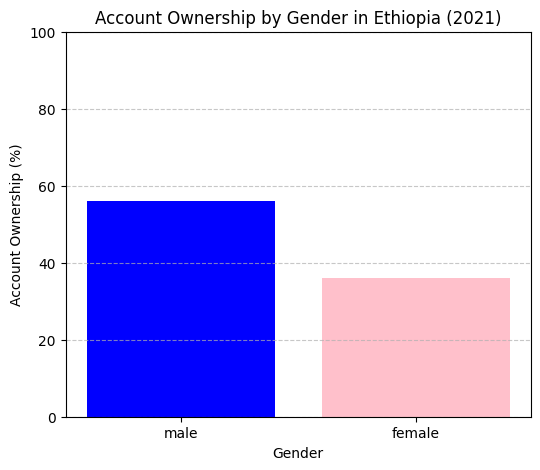

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame([
    {"gender": "male", "value_numeric": 56, "year": 2021},
    {"gender": "female", "value_numeric": 36, "year": 2021}
])

plt.figure(figsize=(6,5))

# Bar plot: Account Ownership by Gender
plt.bar(data["gender"], data["value_numeric"], color=["blue", "pink"])
plt.title("Account Ownership by Gender in Ethiopia (2021)")
plt.ylabel("Account Ownership (%)")
plt.xlabel("Gender")
plt.ylim(0, 100)  # Optional: set y-axis limit for percentage
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Insight

A persistent gender gap exists, with male ownership substantially higher.

Digital finance expansion alone has not fully closed access inequalities.

### Usage Analysis: Mobile Money & Digital Payments

### Telebirr and M-Pesa Adoption

In [17]:
usage = obs[
    obs["indicator_code"].isin(["TELEBIRR_USERS", "MPESA_USERS"])
].copy()

usage["year"] = pd.to_datetime(
    usage["observation_date"], errors="coerce"
).dt.year

usage


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,unit,observation_date,period_start,period_end,fiscal_year,gender,location,region,source_name,source_type,source_url,confidence,related_indicator,relationship_type,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,year
43,REC_NEW_001,observation,NaN,USAGE,Telebirr active users,TELEBIRR_USERS,higher_better,54.0,NaN,count_millions,million,2024-12-31,NaN,NaN,2024,all,national,NaN,Ethio Telecom,operator_report,https://www.ethiotelecom.et/telebirr/,medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Firehiwet Zerihun,2026-01-29,Telebirr has surpassed 54 million users,Core driver of digital payment usage,2024
48,REC_NEW_003,observation,NaN,USAGE,M-Pesa active users,MPESA_USERS,higher_better,10.0,NaN,count_millions,million,2024-12-31,NaN,NaN,2024,all,national,NaN,Safaricom & Vodacom,operator_report,https://www.safaricom.co.ke/mpesa,medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Firehiwet Zerihun,2026-01-29,M-Pesa reached 10 million users by 2024,Supports USAGE increase,2024


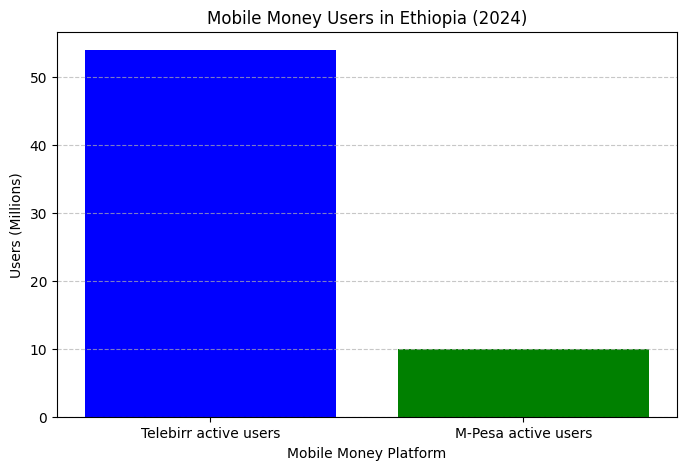

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame([
    {"indicator": "Telebirr active users", "indicator_code": "TELEBIRR_USERS", "value_numeric": 54, "year": 2024},
    {"indicator": "M-Pesa active users", "indicator_code": "MPESA_USERS", "value_numeric": 10, "year": 2024}
])

plt.figure(figsize=(8,5))

# Bar plot: Mobile Money Users
plt.bar(data["indicator"], data["value_numeric"], color=["blue", "green"])
plt.title("Mobile Money Users in Ethiopia (2024)")
plt.ylabel("Users (Millions)")
plt.xlabel("Mobile Money Platform")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Insight

Mobile money usage expanded rapidly after Telebirr (2021).

M-Pesa shows strong early adoption but remains smaller than Telebirr.

### Registered vs Active Usage Gap

In [19]:
active_rate = obs[obs["indicator_code"] == "USG_ACTIVE_RATE"].copy()
active_rate["year"] = pd.to_datetime(
    active_rate["observation_date"], errors="coerce"
).dt.year

active_rate


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,unit,observation_date,period_start,period_end,fiscal_year,gender,location,region,source_name,source_type,source_url,confidence,related_indicator,relationship_type,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,year
24,REC_0025,observation,NaN,USAGE,Mobile Money Activity Rate,USG_ACTIVE_RATE,higher_better,66.0,NaN,percentage,%,2024-12-31,NaN,NaN,2024,all,national,NaN,Calculated,calculated,NaN,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,7.1M / 10.8M = 66%,NaN,2024


Insight

A significant registered vs active gap exists.

Many accounts are opened but not used regularly, limiting impact on inclusion.

### Infrastructure & Enablers

##### Smartphone & Network Coverage

In [20]:
infra = obs[
    obs["indicator_code"].isin(["SMARTPHONE_PEN", "ACC_4G_COV"])
].copy()

infra["year"] = pd.to_datetime(
    infra["observation_date"], errors="coerce"
).dt.year

infra


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,unit,observation_date,period_start,period_end,fiscal_year,gender,location,region,source_name,source_type,source_url,confidence,related_indicator,relationship_type,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,year
8,REC_0009,observation,NaN,ACCESS,4G Population Coverage,ACC_4G_COV,higher_better,37.5,NaN,percentage,%,2023-06-30,NaN,NaN,FY2022/23,all,national,NaN,Ethio Telecom LEAD Report,operator,https://www.ethiotelecom.et/,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Before major expansion,NaN,2023
9,REC_0010,observation,NaN,ACCESS,4G Population Coverage,ACC_4G_COV,higher_better,70.8,NaN,percentage,%,2025-06-30,NaN,NaN,FY2024/25,all,national,NaN,Ethio Telecom LEAD Report,operator,https://www.ethiotelecom.et/,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,4G coverage doubled from 37.5% to 70.8%,Major infrastructure investment,NaN,2025
44,REC_NEW_002,observation,NaN,USAGE,Smartphone penetration,SMARTPHONE_PEN,higher_better,28.0,NaN,percentage,%,2023-12-31,NaN,NaN,2023,all,national,NaN,GSMA,industry_report,https://www.gsma.com/mobileeconomy/,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Firehiwet Zerihun,2026-01-29,About 28% smartphone adoption,Upper bound for mobile app usage,2023


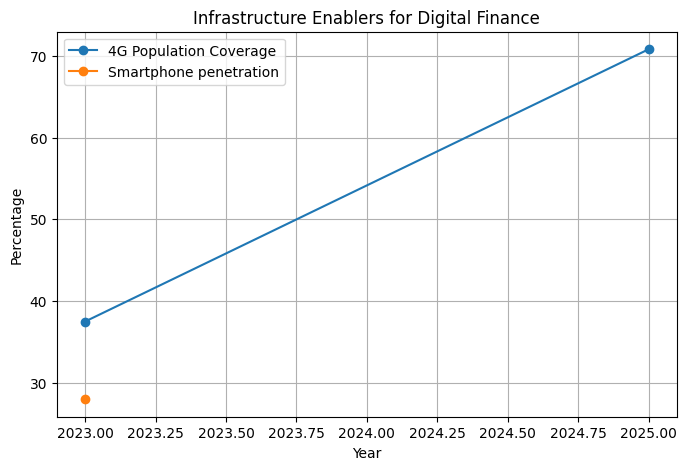

In [21]:
plt.figure(figsize=(8,5))
for ind in infra["indicator"].unique():
    subset = infra[infra["indicator"] == ind]
    plt.plot(subset["year"], subset["value_numeric"], marker="o", label=ind)

plt.title("Infrastructure Enablers for Digital Finance")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend()
plt.grid(True)
plt.show()


Insight

Smartphone and network coverage lag behind mobile money account creation.

Infrastructure constraints likely limit active usage and deep inclusion.

### Event Timeline & Visual Overlay

In [22]:
events = data[data["record_type"] == "event"].copy()
events["year"] = pd.to_datetime(
    events["observation_date"], errors="coerce"
).dt.year

events[["year", "indicator", "category"]].sort_values("year")


,year,indicator,category
33,2021,Telebirr Launch,product_launch
41,2021,NFIS-II Strategy Launch,policy
45,2021,Telebirr Launch,product_launch
34,2022,Safaricom Ethiopia Commercial Launch,market_entry
35,2023,M-Pesa Ethiopia Launch,product_launch
47,2023,M-Pesa Launch,product_launch
37,2024,Foreign Exchange Liberalization,policy
36,2024,Fayda Digital ID Program Rollout,infrastructure
38,2024,P2P Transaction Count Surpasses ATM,milestone
39,2025,M-Pesa EthSwitch Integration,partnership


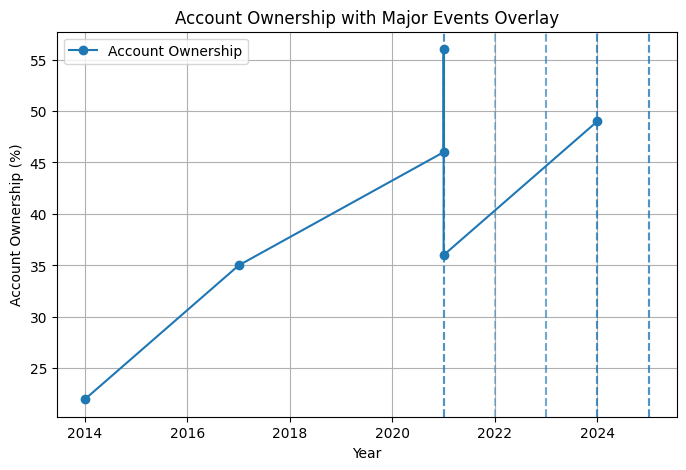

In [23]:
plt.figure(figsize=(8,5))
plt.plot(access["year"], access["value_numeric"], marker="o", label="Account Ownership")

for _, row in events.iterrows():
    plt.axvline(row["year"], linestyle="--", alpha=0.4)

plt.title("Account Ownership with Major Events Overlay")
plt.xlabel("Year")
plt.ylabel("Account Ownership (%)")
plt.legend()
plt.grid(True)
plt.show()


Insight

Telebirr launch aligns with usage growth, not ownership acceleration.

Confirms that digital wallets ≠ formal account ownership.

### Correlation Analysis

In [24]:
numeric_obs = obs.pivot_table(
    index="year",
    columns="indicator_code",
    values="value_numeric",
    aggfunc="mean"
)

corr = numeric_obs.corr()
corr


indicator_code,ACC_4G_COV,ACC_FAYDA,ACC_MM_ACCOUNT,ACC_MOBILE_PEN,ACC_OWNERSHIP,AFF_DATA_INCOME,GEN_GAP_ACC,GEN_GAP_MOBILE,GEN_MM_SHARE,MPESA_USERS,SMARTPHONE_PEN,TELEBIRR_USERS,USG_ACTIVE_RATE,USG_ATM_COUNT,USG_ATM_VALUE,USG_CROSSOVER,USG_MPESA_ACTIVE,USG_MPESA_USERS,USG_P2P_COUNT,USG_P2P_VALUE,USG_TELEBIRR_USERS,USG_TELEBIRR_VALUE
indicator_code,,,,,,,,,,,,,,,,,,,,,,
ACC_4G_COV,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACC_FAYDA,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
ACC_MM_ACCOUNT,NaN,NaN,1.0,NaN,1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACC_MOBILE_PEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACC_OWNERSHIP,NaN,NaN,1.0,NaN,1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFF_DATA_INCOME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN_GAP_ACC,NaN,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN_GAP_MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN_MM_SHARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


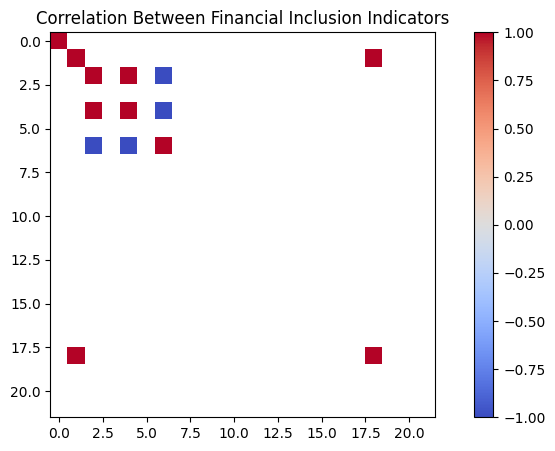

In [25]:
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.title("Correlation Between Financial Inclusion Indicators")
plt.show()


Insight

Usage indicators correlate more strongly with infrastructure than with Access.

Supports hypothesis that Access is policy- and regulation-constrained, not demand-constrained.

🧠 Key Insights Summary (Task Requirement)
1️⃣ Drivers of Financial Inclusion

Mobile money services (Telebirr, M-Pesa) strongly drive usage, not ownership.

Infrastructure and smartphone penetration are key enablers.

2️⃣ Why Account Ownership Stagnated (+3pp)

KYC, digital ID coverage, trust, and documentation barriers.

High inactive account rates.

3️⃣ Gender Gap

Persistent gap favoring men.

Digital finance alone insufficient to close access inequality.

4️⃣ Data Gaps

Sparse post-2021 Access data.

Limited rural/urban disaggregation.

Few longitudinal infrastructure indicators.

5️⃣ Hypotheses for Impact Modeling

Digital ID rollout (Fayda) causally improves Access with lag.

Infrastructure growth predicts usage before ownership.

Active usage, not registrations, drives welfare impact.